# use_OSN: demonstrate usage of Open Storage Network resources for

multiplex imaging data

Vincent J. Carey, stvjc at channing.harvard.edu  
Ludwig Geistlinger, ludwig_geistlinger at hms.harvard.edu  
Alex Mahmoud, mahmoudalexandru at gmail.com  
August 30, 2022

# Introduction

The purpose of this vignette is to briefly describe access to a tissue
microarray dataset lodged in the NSF ACCESS Open Storage Network (OSN).

# TMA11

## Synapse repository

This [Synapse](https://www.synapse.org) repository contains data related
to the MCMICRO system as described in a recent [Nature Methods
paper](https://doi.org/10.1038/s41592-021-01308-y).

    https://www.synapse.org/#!Synapse:syn22345749

## OSN address and query

    You can browse the TMA11 data at the following address: https://mghp.osn.xsede.org/bir190004-bucket01/index.html#TMA11/

The data is free and publicly accessible and can be downloaded locally
or accessed remotely.

### Python Example

In python, the fifth core in the array can be read using

In [ ]:
import s3fs
import zarr
fs = s3fs.S3FileSystem(anon=True, key="dummy", secret="dummy", 
    client_kwargs={'endpoint_url': "https://mghp.osn.xsede.org/"})
mapper = fs.get_mapper('bir190004-bucket01/TMA11/zarr/5.zarr')
zarr.load(mapper)

array([[[ 95,  73, 127, ...,  93,  77, 166],
        [107, 111, 126, ...,  53,  78,  62],
        [110,  84, 118, ..., 118,  92,  73],
        ...,
        [ 53,  55,  90, ...,  60,  91,  89],
        [ 74,  56, 106, ..., 123,  95,  86],
        [100,  57,  94, ..., 109, 112,  78]],

       [[199, 181, 218, ..., 232, 155, 163],
        [200, 203, 190, ..., 206, 180, 212],
        [240, 249, 207, ..., 184, 218, 163],
        ...,
        [177, 182, 188, ..., 235, 269, 192],
        [253, 266, 243, ..., 187, 206, 200],
        [245, 224, 217, ..., 170, 133, 214]],

       [[ 91,  80,  80, ...,  95,  15, 100],
        [ 59,  41,  58, ...,  72,  80,   0],
        [ 39,  47,  73, ...,  37,  61,  81],
        ...,
        [ 71,  51,   2, ...,  75,  41,  52],
        [ 62,  62,  66, ...,  70,  78,  65],
        [ 40,  35,  83, ...,  38,  61,  55]],

       ...,

       [[253, 258, 296, ..., 319, 252, 240],
        [292, 314, 296, ..., 220, 303, 267],
        [294, 256, 258, ..., 283, 244, 291

### R example

In R, the following can be used, once zarr’s python library has been
installed in the appropriate python distribution.

In [ ]:
library(reticulate)
s3fs = import("s3fs")
zr = import("zarr")
fs = s3fs$S3FileSystem(anon='True', key="dummy", secret="dummy",
    client_kwargs=list(endpoint_url = 'https://mghp.osn.xsede.org/'))
mapper = fs$get_mapper('bir190004-bucket01/TMA11/zarr/5.zarr')
c5 = zr$load(mapper)
dim(c5)

[1]   64 3007 3007

On a decent network connection the load takes under 20 seconds. This can
also vary based on your geographical proximity to the hosting pods. The
data is hosted on the Open Storage Network in the United States.

The R array c5 serializes to about 1 GB of numeric data (64 x 3007 x
3007).

A small selection of channels from R `image()`:

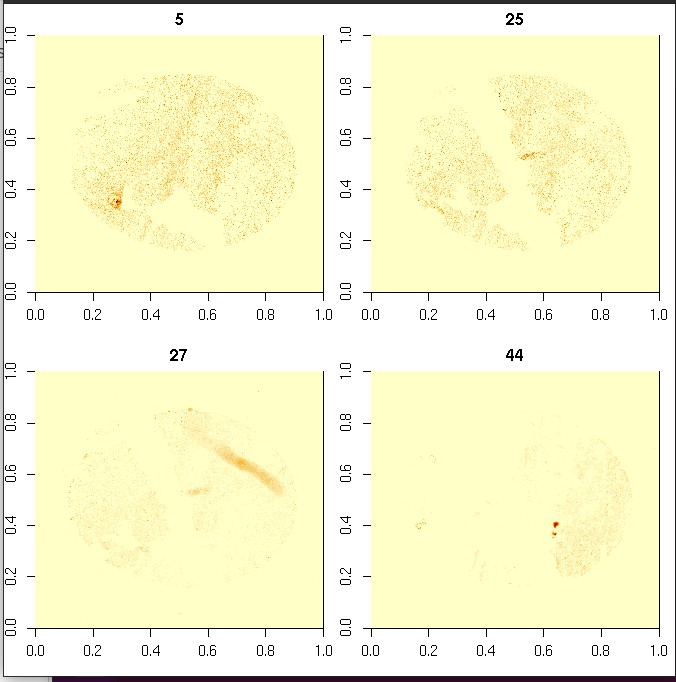